Decision tree

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,  ConfusionMatrixDisplay
from matplotlib.pylab import rcParams
#Load the dataset into a pandas DataFrame.
df = pd.read_csv('preprocessed/df.csv')
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [20]:
# delete the categorical columns 
df['class'].replace(['ckd', 'notckd'], [1, 0], inplace=True)
numeric = df._get_numeric_data()

numeric

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0


In [21]:
y = np.asarray(numeric['class'])
X = np.asarray(numeric.drop(columns=['class']))

print(len(y))

400


<BarContainer object of 2 artists>

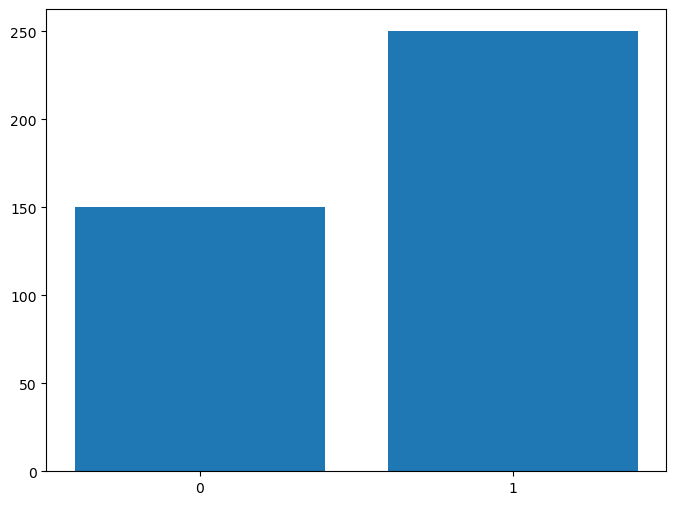

In [26]:
# number of class 1 vs class 0 attributes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nonzero = np.count_nonzero(y)
ax.bar(['0','1'], [y.size - nonzero, nonzero] )

In [28]:
# split the dataset to train and test sets. set the test set size to 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, )

In [29]:
# replace NANs with 0s both in X_train, X_test
X_train_no_nan = np.nan_to_num(X_train, copy=True, nan=0 )
X_test_no_nan = np.nan_to_num(X_test, copy=True, nan=0 )

In [30]:
from sklearn.metrics import confusion_matrix


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_no_nan,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_no_nan)

print(classification_report(y_test, y_pred, labels=clf.classes_))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.92      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



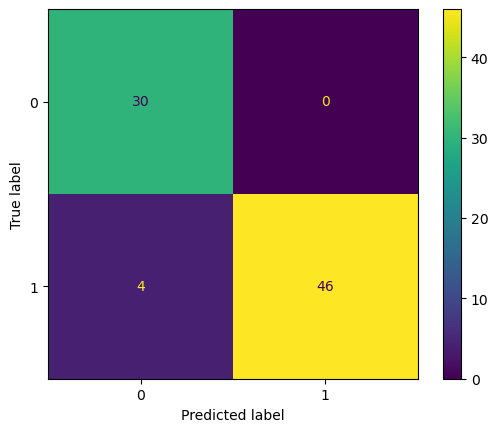

In [31]:
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

<Axes: >

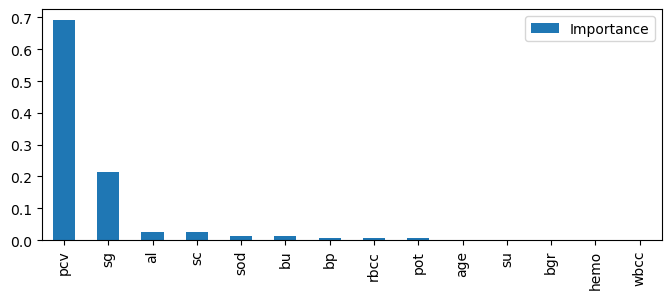

In [33]:
#  plot the importance of each feature as a bar plot and plot the decision tree
feat_importances = pd.DataFrame(clf.feature_importances_, index=numeric.drop(columns=['class']).columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,3))

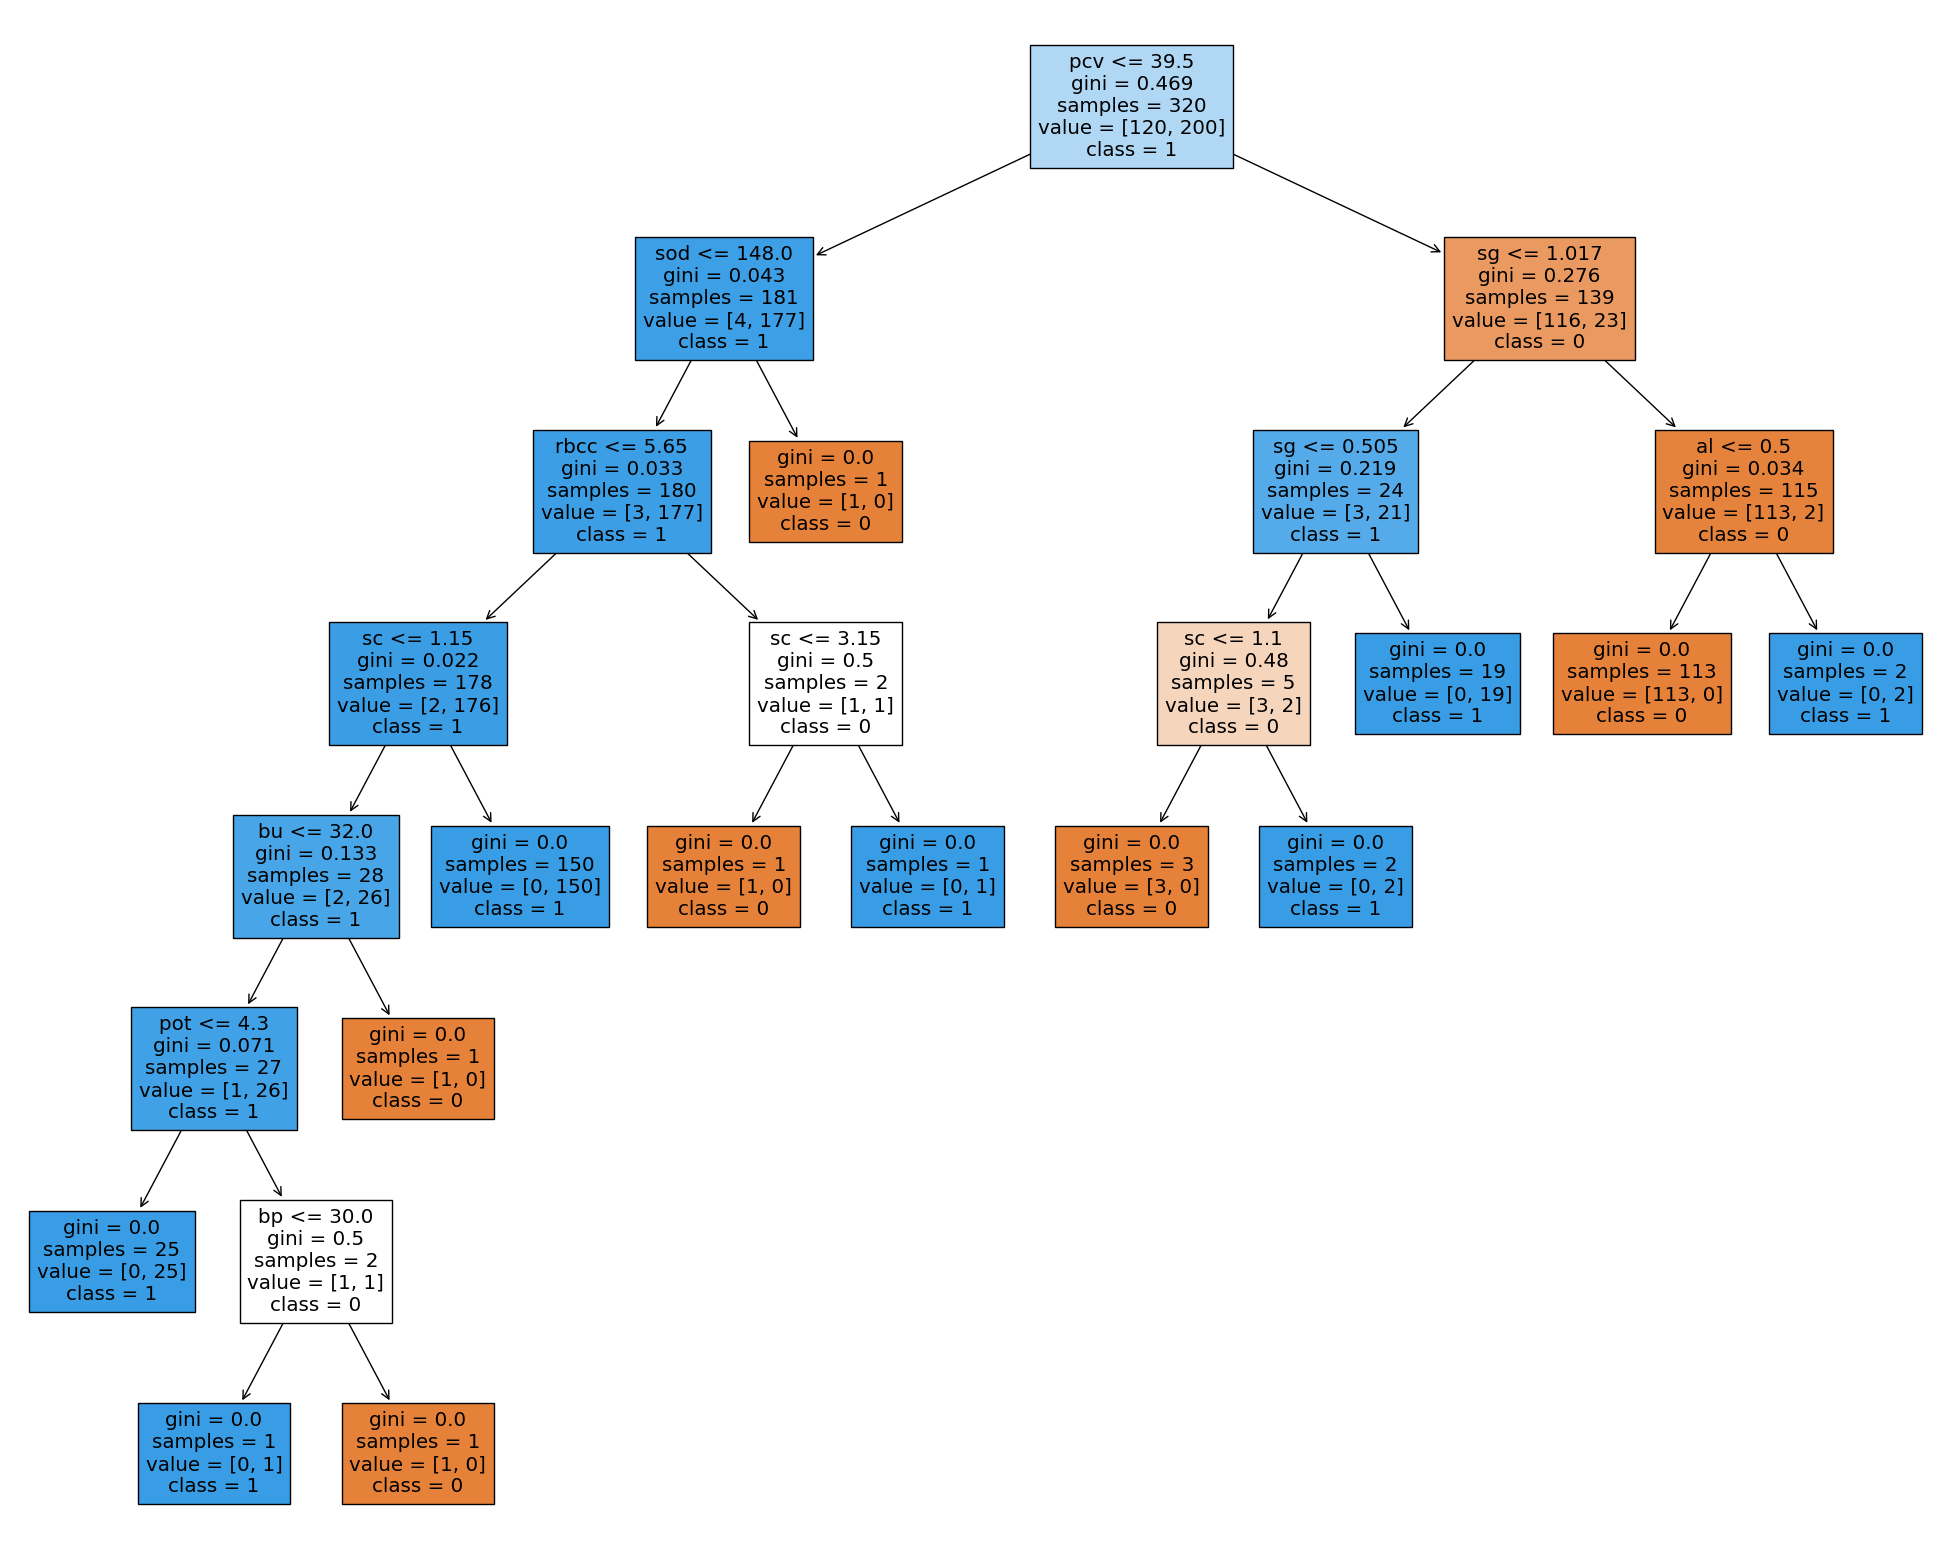

In [35]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=numeric.drop(columns=['class']).columns, class_names=['0', '1'], filled=True)

## Random forest


In [36]:
forest = RandomForestClassifier()
forest.fit(X_train_no_nan, y_train)
y_forest_pred = forest.predict(X_test_no_nan)

print(classification_report(y_test, y_forest_pred, labels=forest.classes_))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



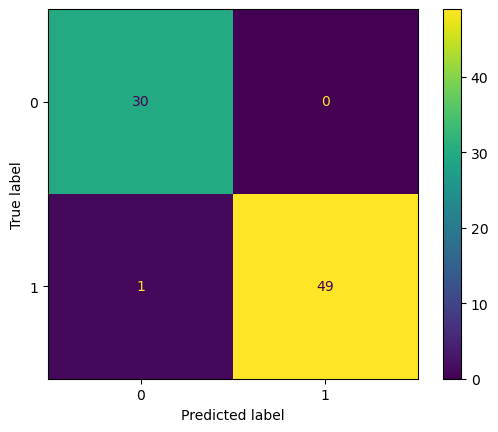

In [37]:
conf_mat_forest = confusion_matrix(y_test, y_forest_pred)
disp_forest = ConfusionMatrixDisplay(conf_mat_forest, display_labels=forest.classes_)
disp_forest.plot()
plt.show()

<Axes: >

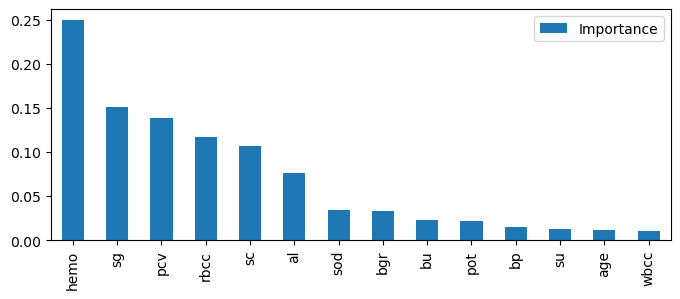

In [41]:
# Plot the feature importance as a bar plot
feat_importances_forest = pd.DataFrame(forest.feature_importances_, index=numeric.drop(columns=['class']).columns, columns=["Importance"])
feat_importances_forest.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_forest.plot(kind='bar', figsize=(8,3))
